# Market Basket Analysis - Phase 4

**By: SALMAAN AHMED KN**  
*B.E. CSE, 3rd Year, 5th Semester*  
*311421104079*  
*Meenakshi College of Engineering - 3114*

## Purpose

This code's purpose is to find valuable insights by analyzing transaction data from a retail store.

## Key Steps

### Library Imports

We start by importing important tools like pandas, numpy, matplotlib, and mlxtend, which help us analyze and visualize data.

### Data Preparation

The code loads data from an Excel file, cleans it by removing missing parts, and calculates some new values like 'SumPrice.' It also figures out which items are selling the best in different countries.

### Data Transformation

We change the data into a format that helps us understand which items are bought together. This makes it easier to find relationships between items.

### Association Rule Mining (Apriori)
We leverage the Apriori algorithm, a powerful tool in data mining, to identify frequent itemsets and generate association rules based on the lift metric.

### Finding Patterns
These association rules offer a valuable insight into customer behavior, suggesting opportunities for cross-selling and improved sales strategies.

## Summary
This code provides a comprehensive approach to uncover meaningful insights from transaction data, with a strong emphasis on association rule mining through the Apriori algorithm. It aids in enhancing sales strategies and decision-making processes based on customer purchase patterns.

## Insight Generation from Market Basket Analysis

**Overview:**
Market Basket Analysis (MBA) helps businesses understand customer behavior from transaction data. Here are key insights:

1. **Top-Selling Items in Different Countries:**
    - Identifies popular items by country for tailored marketing and stock management.

2. **Total Sales by Country:**
    - Reveals high-revenue countries, aiding marketing and expansion decisions.

3. **Popular Items in the UK:**
    - Lists UK's favorite items, guiding inventory and marketing strategies.

4. **High Revenue Items Globally:**
    - Highlights top-revenue products for pricing, inventory, and marketing insights.

5. **Association Rules:**
    - Shows item associations for cross-selling and bundling opportunities.

6. **Scatter Plot of Associations:**
    - Visualizes strong product relationships for effective promotions.

7. **Top Association Rules by Lift:**
    - Identifies high-impact rules for marketing strategies.

8. **Filtering Rules by Lift Range:**
    - Focuses on strong associations for specialized promotions.

**Conclusion:**
Use these insights to enhance customer experience, optimize inventory, and boost sales and marketing strategies.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_excel("D:\MCE\ibm_mba_dataset\Assignment-1_Data.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [5]:
#testing whether the data is been imported
data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
data.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


In [7]:
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [8]:
#removing null values from itemname and the customerID column
data.dropna(axis=0, subset=['Itemname'], inplace = True)
data.dropna(axis=0, subset=['CustomerID'], inplace = True)

In [9]:
#Dropping rows where Quantity <=0
data = data[data["Quantity"]>0]
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [10]:
# Removing duplicates
data.drop_duplicates()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
#Fill missing customer IDs
data['CustomerID'].fillna(99999, inplace=True)
#Create SumPrice column
data["SumPrice"]=data["Quantity"]*data["Price"]

In [12]:
#Find the best selling items in each country
best_selling_items = data.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
46,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
24,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4000
19,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
41,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
40,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
42,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,636
25,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [13]:
#Find the total sales by country.
sales = data.groupby(['Country']).agg({'SumPrice': 'sum'}).reset_index()
sales = sales.sort_values('SumPrice', ascending=False).reset_index(drop=True)
sales

,Country,SumPrice
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209024.050
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,56443.950
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


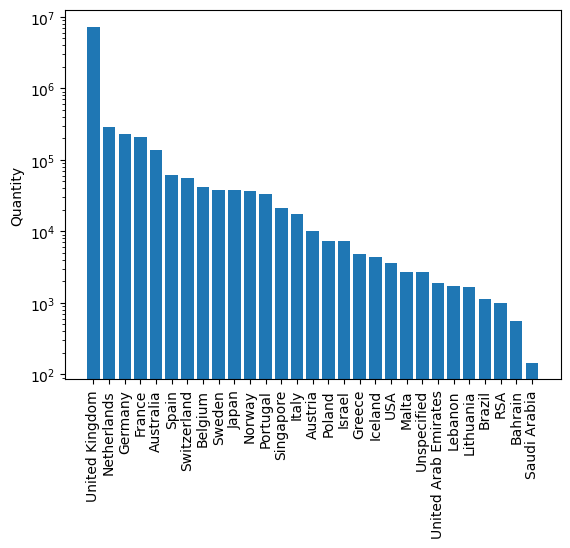

In [14]:
#Visualizing Total sales by country.
plt.bar(sales["Country"],sales["SumPrice"])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Filter the UK data and rank the best-selling items in the UK by quantity sold.
uk_data = data[data["Country"] == "United Kingdom"]
uk_data.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49182
JUMBO BAG RED RETROSPOT                41981
WHITE HANGING HEART T-LIGHT HOLDER     34648
                                       ...  
WHITE STONE/CRYSTAL EARRINGS               1
CHERRY BLOSSOM PURSE                       1
BLUE/GREEN SHELL NECKLACE W PENDANT        1
BLUE/NAT SHELL NECKLACE W PENDANT          1
CAPIZ CHANDELIER                           1
Name: Quantity, Length: 3833, dtype: int64

In [16]:
#Let's identify the globally top-earning items.
top_revenue_items = data.groupby(['Itemname']).agg({'Price': 'mean', 'Quantity': 'sum', 'SumPrice': 'sum'}).reset_index()
top_revenue_items['Count'] = data.groupby(['Itemname']).size().values
top_revenue_items = top_revenue_items.sort_values("SumPrice", ascending=False)

top_revenue_items

,Itemname,Price,Quantity,SumPrice,Count
2295,"PAPER CRAFT , LITTLE BIRDIE",2.080000,80995,168469.600,1
2738,REGENCY CAKESTAND 3 TIER,12.490140,11679,134253.100,1643
3667,WHITE HANGING HEART T-LIGHT HOLDER,2.894241,35425,96931.550,1976
1741,JUMBO BAG RED RETROSPOT,2.015462,45715,84316.260,1591
1969,MEDIUM CERAMIC TOP STORAGE JAR,1.222368,77436,80846.970,190
...,...,...,...,...,...
2418,PINK CRYSTAL GUITAR PHONE CHARM,0.850000,1,0.850,1
3525,VINTAGE BLUE TINSEL REEL,0.420000,2,0.840,1
2902,SET 12 COLOURING PENCILS DOILEY,0.650000,1,0.650,1
1605,HEN HOUSE W CHICK IN NEST,0.420000,1,0.420,1


In [17]:
#Convert the dataset into transactional format
transactions = data.groupby(['BillNo'])['Itemname'].apply(list)
transactions

BillNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
                                ...                        
581583    [LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...
581584    [RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...
581585    [BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...
581586    [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
581587    [CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...
Name: Itemname, Length: 18163, dtype: object

In [18]:
#Create a one-hot matrix of the products
one_hot = pd.get_dummies(data['Itemname'])
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522062,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#Add the BillNo column back to the one-hot encoded matrix
one_hot['BillNo']=data['BillNo']
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,BillNo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,536365
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,536365
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,536365
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,536365
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,581587
522060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,581587
522061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,581587
522062,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,581587


In [20]:
#Now, we group the One-Hot Matrix by BillNo and sum the values
one_hot = one_hot.groupby('BillNo').sum()
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [21]:
#Now, we merge the one-hot encoded matrix, with the transactional data
transaction_matrix = pd.merge(transactions, one_hot, on='BillNo')
transaction_matrix

,Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
 #Now we have to convert the product columns to 0s and 1s. We are converting sum values to binary as number doesn't matter
transaction_matrix[one_hot.columns[:-1]] = (transaction_matrix[one_hot.columns[:-1]] >= 1).astype(int)
transaction_matrix

,Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/98.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.3 kB ? eta -:--:--
     ----------------------- -------------- 61.4/98.3 kB 825.8 kB/s eta 0:00:01
     ---------------------------------------- 98.3/98.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 2.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.

In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
print(transaction_matrix.dtypes)

Itemname                            object
10 COLOUR SPACEBOY PEN               int32
12 COLOURED PARTY BALLOONS           int32
12 DAISY PEGS IN WOOD BOX            int32
12 EGG HOUSE PAINTED WOOD            int32
                                     ...  
ZINC T-LIGHT HOLDER STARS SMALL      int32
ZINC TOP  2 DOOR WOODEN SHELF        int32
ZINC WILLIE WINKIE  CANDLE STICK     int32
ZINC WIRE KITCHEN ORGANISER          int32
ZINC WIRE SWEETHEART LETTER TRAY     int64
Length: 3847, dtype: object


In [25]:
transaction_matrix.iloc[:, 1:] = transaction_matrix.iloc[:, 1:].astype(bool)
#Perform frequent itemset mining
frequent_itemsets = apriori(transaction_matrix.iloc[:, 1:], min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.013049,(10 COLOUR SPACEBOY PEN)
1,0.010130,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.015086,(12 PENCIL SMALL TUBE WOODLAND)
3,0.016792,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.015911,(12 PENCILS SMALL TUBE SKULL)
...,...,...
963,0.014040,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR..."
964,0.012113,"(LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPO..."
965,0.013379,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP..."
966,0.012002,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."


In [26]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.054617,0.018554,0.010075,0.184476,9.942534,0.009062,1.203454,0.951383
1,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.018554,0.054617,0.010075,0.543027,9.942534,0.009062,2.068794,0.916426
2,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.034686,0.026427,0.011617,0.334921,12.673257,0.010700,1.463844,0.954191
3,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.026427,0.034686,0.011617,0.439583,12.673257,0.010700,1.722494,0.946097
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.034686,0.028079,0.011782,0.339683,12.097361,0.010808,1.471899,0.950299
...,...,...,...,...,...,...,...,...,...,...
933,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...","(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE)",0.028079,0.022959,0.010461,0.372549,16.226877,0.009816,1.557159,0.965484
934,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...",0.057204,0.015031,0.010461,0.182868,12.166425,0.009601,1.205398,0.973495
935,(LUNCH BAG CARS BLUE),"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",0.052194,0.016572,0.010461,0.200422,12.093899,0.009596,1.229934,0.967829
936,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE,...",0.050322,0.014205,0.010461,0.207877,14.634412,0.009746,1.244498,0.981036


In [27]:
#Let's see the top 10 rules by lift
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
528,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.013489,0.013269,0.010130,0.751020,56.600762,0.009952,3.963101,0.995764
529,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.013269,0.013489,0.010130,0.763485,56.600762,0.009952,4.171038,0.995542
531,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160,0.993765
530,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.016572,0.013544,0.011397,0.687708,50.775748,0.011172,3.158758,0.996825
505,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
504,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
560,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.017398,0.015306,0.012608,0.724684,47.346860,0.012342,3.576590,0.996211
561,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.015306,0.017398,0.012608,0.823741,47.346860,0.012342,5.574762,0.994095
507,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738
506,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620


In [33]:
pip install mpld3

     ---------------------------------------- 0.0/201.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/201.2 kB ? eta -:--:--
     ----------- ------------------------- 61.4/201.2 kB 812.7 kB/s eta 0:00:01
     -------------------------------------- 201.2/201.2 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import mpld3

# create scatter plot with x and y as lift and confidence values
fig, ax = plt.subplots()
scatter = ax.scatter(rules['lift'], rules['confidence'], alpha=0.5)

# Define tooltips
tooltips = []
for i in range(len(rules)):
    rule = rules.iloc[i]
    tooltip = f"Rule: {rule['antecedents']} -> {rule['consequents']}\nSupport: {rule['support']:.3f}\nConfidence: {rule['confidence']:.3f}\nLift: {rule['lift']:.3f}"
    tooltips.append(tooltip)

# Add tooltips to scatter plot using mpld3
mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(scatter, tooltips))

# Set axis labels and title
ax.set_xlabel("Lift")
ax.set_ylabel("Confidence")
ax.set_title("Association Rules Scatter Plot")

# Show the plot
mpld3.display()

In [29]:
rules[(rules['lift'] > 40) & (rules['lift'] < 50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.017123,0.014480,0.011232,0.655949,45.300356,0.010984,2.864455,0.994962
79,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.014480,0.017123,0.011232,0.775665,45.300356,0.010984,4.381300,0.992294
486,(PINK VINTAGE PAISLEY PICNIC BAG),(SCANDINAVIAN PAISLEY PICNIC BAG),0.015306,0.017013,0.010681,0.697842,41.019092,0.010421,3.253220,0.990786
487,(SCANDINAVIAN PAISLEY PICNIC BAG),(PINK VINTAGE PAISLEY PICNIC BAG),0.017013,0.015306,0.010681,0.627832,41.019092,0.010421,2.645830,0.992506
502,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.018499,0.016902,0.013544,0.732143,43.315670,0.013231,3.670231,0.995326
503,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.016902,0.018499,0.013544,0.801303,43.315670,0.013231,4.939685,0.993710
504,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
505,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
506,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620
507,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738


In [30]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
top_lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
528,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.013489,0.013269,0.010130,0.751020,56.600762,0.009952,3.963101,0.995764
529,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.013269,0.013489,0.010130,0.763485,56.600762,0.009952,4.171038,0.995542
531,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160,0.993765
530,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.016572,0.013544,0.011397,0.687708,50.775748,0.011172,3.158758,0.996825
505,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
504,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
560,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.017398,0.015306,0.012608,0.724684,47.346860,0.012342,3.576590,0.996211
561,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.015306,0.017398,0.012608,0.823741,47.346860,0.012342,5.574762,0.994095
507,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738
506,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620


In [31]:
frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets
586,0.105654,(WHITE HANGING HEART T-LIGHT HOLDER)
411,0.089578,(REGENCY CAKESTAND 3 TIER)
244,0.086605,(JUMBO BAG RED RETROSPOT)
35,0.074767,(ASSORTED COLOUR BIRD ORNAMENT)
334,0.074437,(PARTY BUNTING)
278,0.069702,(LUNCH BAG RED RETROSPOT)
465,0.061223,(SET OF 3 CAKE TINS PANTRY DESIGN)
370,0.057424,(POSTAGE)
270,0.057204,(LUNCH BAG BLACK SKULL.)
320,0.054617,(PACK OF 72 RETROSPOT CAKE CASES)


In [32]:
top_rules = rules[rules['lift'] > 5]
print(top_rules[['antecedents','consequents','lift','confidence']])

                                           antecedents   
0                    (PACK OF 72 RETROSPOT CAKE CASES)  \
1                    (60 CAKE CASES DOLLY GIRL DESIGN)   
2                        (60 TEATIME FAIRY CAKE CASES)   
3                     (72 SWEETHEART FAIRY CAKE CASES)   
4                        (60 TEATIME FAIRY CAKE CASES)   
..                                                 ...   
933  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...   
934                          (LUNCH BAG  BLACK SKULL.)   
935                              (LUNCH BAG CARS BLUE)   
936                          (LUNCH BAG PINK POLKADOT)   
937                          (LUNCH BAG RED RETROSPOT)   

                                           consequents       lift  confidence  
0                    (60 CAKE CASES DOLLY GIRL DESIGN)   9.942534    0.184476  
1                    (PACK OF 72 RETROSPOT CAKE CASES)   9.942534    0.543027  
2                     (72 SWEETHEART FAIRY CAKE CASES)  12.6732

In [33]:
cross_sell = rules[(rules['antecedents'].apply(len)==1) & 
                   (rules['consequents'].apply(len)==1)]

for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}) -> frozenset({'60 CAKE CASES DOLLY GIRL DESIGN'})
frozenset({'60 CAKE CASES DOLLY GIRL DESIGN'}) -> frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'72 SWEETHEART FAIRY CAKE CASES'})
frozenset({'72 SWEETHEART FAIRY CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 60 DINOSAUR CAKE CASES'})
frozenset({'PACK OF 60 DINOSAUR CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'})
frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})


In [34]:
substitutes = rules[rules['lift'] < 1] 
complements = rules[rules['lift'] > 1]

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Substitutes: Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Complements:                          antecedents                        consequents   
0  (PACK OF 72 RETROSPOT CAKE CASES)  (60 CAKE CASES DOLLY GIRL DESIGN)  \
1  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
2      (60 TEATIME FAIRY CAKE CASES)   (72 SWEETHEART FAIRY CAKE CASES)   
3   (72 SWEETHEART FAIRY CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
4      (60 TEATIME FAIRY CAKE CASES)   (PACK OF 60 DINOSAUR CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift   
0            0.054617            0.018554  0.010075    0.184476   9.942534  \
1            0.018554            0.054617  0.010075    0.543027   9.942534   
2            0.034686            0.026427  0.011617    0.334921  12.673257   
3            0.026427            0.034686  0.

In [35]:
# Imports and data loading

# Association rule mining 

# Additional Analysis

# Display top 10 rules by lift  
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
print(top_lift_rules)

# Frequent itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10) 

# Filter and summarize top rules
top_rules = rules[rules['lift'] > 5]  
print(top_rules[['antecedents','consequents','lift','confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len)==1) &  
                   (rules['consequents'].apply(len)==1)]
                   
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))
    
# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]  

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

# Visualization and filtering

# Recommendations

                         antecedents                      consequents   
528          (REGENCY MILK JUG PINK)       (REGENCY SUGAR BOWL GREEN)  \
529       (REGENCY SUGAR BOWL GREEN)          (REGENCY MILK JUG PINK)   
531        (REGENCY TEA PLATE GREEN)        (REGENCY TEA PLATE ROSES)   
530        (REGENCY TEA PLATE ROSES)        (REGENCY TEA PLATE GREEN)   
505      (POPPY'S PLAYHOUSE BEDROOM)   (POPPY'S PLAYHOUSE LIVINGROOM)   
504   (POPPY'S PLAYHOUSE LIVINGROOM)      (POPPY'S PLAYHOUSE BEDROOM)   
560  (SET/6 RED SPOTTY PAPER PLATES)    (SET/6 RED SPOTTY PAPER CUPS)   
561    (SET/6 RED SPOTTY PAPER CUPS)  (SET/6 RED SPOTTY PAPER PLATES)   
507      (POPPY'S PLAYHOUSE KITCHEN)   (POPPY'S PLAYHOUSE LIVINGROOM)   
506   (POPPY'S PLAYHOUSE LIVINGROOM)      (POPPY'S PLAYHOUSE KITCHEN)   

     antecedent support  consequent support   support  confidence       lift   
528            0.013489            0.013269  0.010130    0.751020  56.600762  \
529            0.013269            0

In [36]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10000)

# Create a DataFrame to store insights
insights_df = top_lift_rules[['antecedents', 'consequents', 'lift', 'confidence']]

# Display and print the top 10 rules
print("Top 10 Rules by Lift:")
print(insights_df)

# Save insights to a CSV file
insights_df.to_csv("association_rules_insights.xlsx", index=True)

# Additional Insights
frequent_itemsets.sort_values('support', ascending=False).head(10)  # Display top frequent itemsets
top_rules = rules[rules['lift'] > 5]  # Filter and summarize top rules
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]
print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Top 10 Rules by Lift:
                              antecedents   
528               (REGENCY MILK JUG PINK)  \
529            (REGENCY SUGAR BOWL GREEN)   
531             (REGENCY TEA PLATE GREEN)   
530             (REGENCY TEA PLATE ROSES)   
505           (POPPY'S PLAYHOUSE BEDROOM)   
..                                    ...   
555    (SET OF 3 CAKE TINS PANTRY DESIGN)   
284  (WHITE HANGING HEART T-LIGHT HOLDER)   
285             (JUMBO BAG RED RETROSPOT)   
527  (WHITE HANGING HEART T-LIGHT HOLDER)   
526            (REGENCY CAKESTAND 3 TIER)   

                              consequents       lift  confidence  
528            (REGENCY SUGAR BOWL GREEN)  56.600762    0.751020  
529               (REGENCY MILK JUG PINK)  56.600762    0.763485  
531             (REGENCY TEA PLATE ROSES)  50.775748    0.841463  
530             (REGENCY TEA PLATE GREEN)  50.775748    0.687708  
505        (POPPY'S PLAYHOUSE LIVINGROOM)  48.009211    0.644951  
..                                 